In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [139]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [140]:
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [141]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [142]:
df.shape

(541909, 8)

In [143]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [145]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [146]:
'''Description' and 'CustomerID' columns have null values.
Lets check if we can fill CustomerID from InvoiceNo.

'''

"Description' and 'CustomerID' columns have null values.\nLets check if we can fill CustomerID from InvoiceNo.\n\n"

In [147]:
# Check for one-to-many mapping between InvoiceNo and CustomerID
is_one_to_many = df.groupby('InvoiceNo')['CustomerID'].nunique().max() == 1

if is_one_to_many:
    # Remove rows with missing CustomerID
    df.dropna(subset=['CustomerID'], inplace=True)
    df.reset_index(drop=True, inplace=True)

# Print DataFrame info after cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB
None


In [148]:
# deleted missing customer id has removed all missig description rows too. 

In [149]:
df.shape

(406829, 8)

In [150]:
def isOneToMany(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    print(first == 1)

# Convert 'InvoiceNo' to a string type series
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Convert "Description" to a string type series and remove extra whitespaces
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].str.strip()

# Check for data correctness based on one-to-many relationship between some columns
isOneToMany(df, 'InvoiceNo', 'Country')
isOneToMany(df, 'StockCode', 'Description')


True
False


In [151]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Feature Engineering

In [152]:
# Add new column with bool value: 0 for not cancelled order, 1 for cancelled order
df['CancelledOrder'] = df.InvoiceNo.str.startswith('C').astype('int')


In [153]:
df.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [154]:
# adding a new column for total value for each product with each order
df['totalPrice'] = df.Quantity * df.UnitPrice

In [155]:
df['totalPrice'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: totalPrice, dtype: float64

In [156]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,totalPrice
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0,16.60
406828,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,0,14.85


## EDA

In [157]:
import geopandas as gpd
import seaborn as sns
from matplotlib import pylab
import matplotlib.pyplot as plt

sns.set()

In [158]:
# loading file for plotting on world map


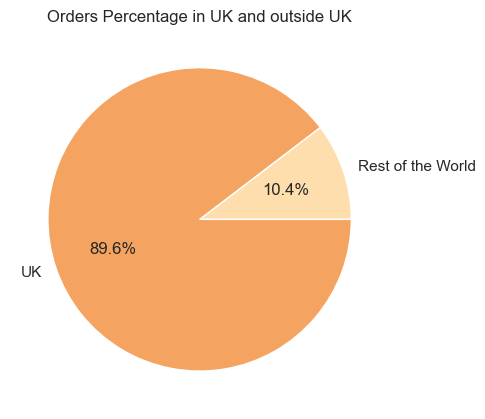

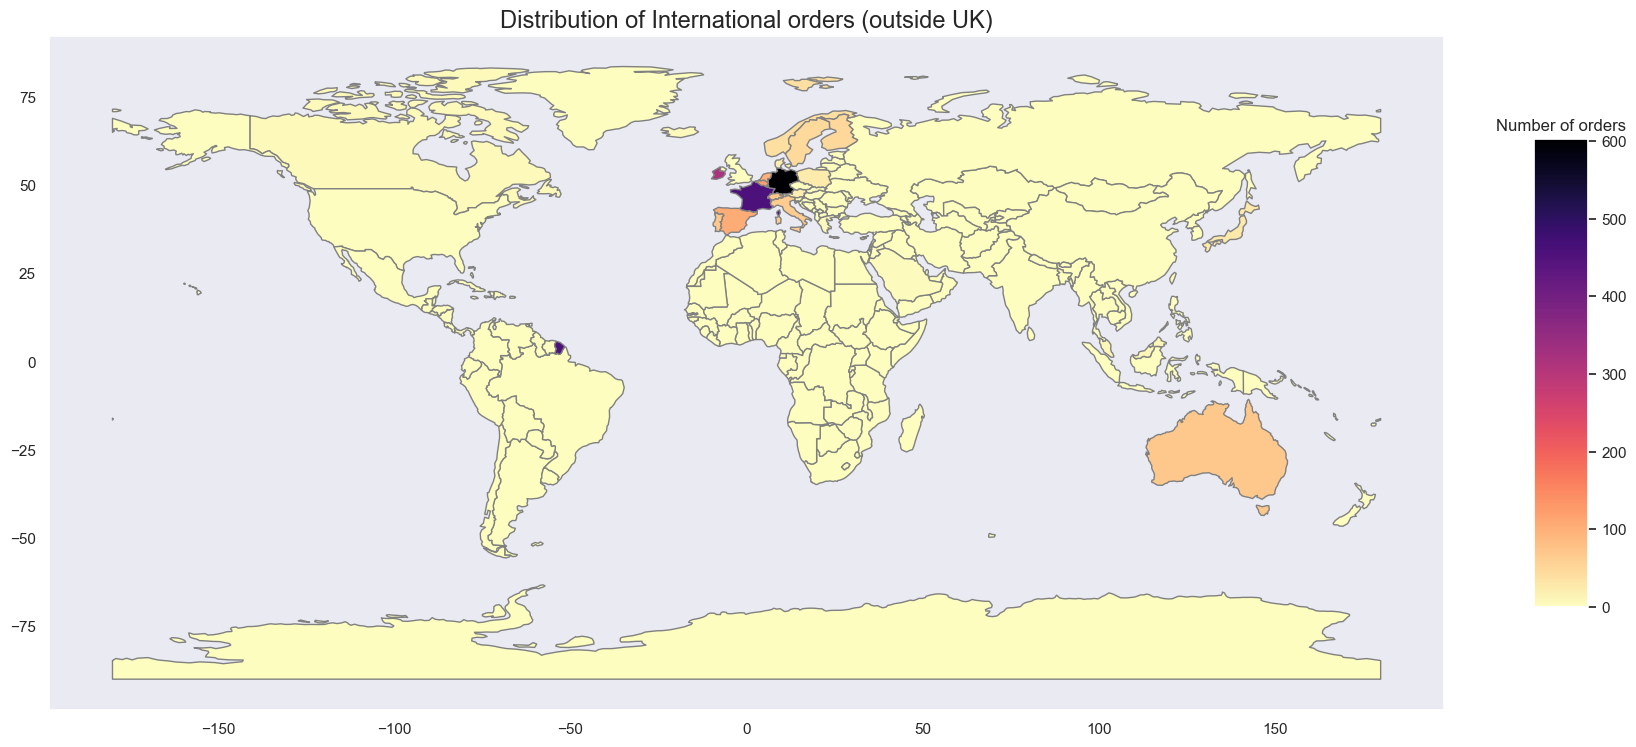

In [159]:
# Load the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define a function to clean and sync country names
def clean_and_sync_country_names(df, world):
    country_name_mapping = {
        'EIRE': 'Ireland',
        'Channel Islands': 'United Kingdom',
        'Czech Republic': 'Czech Rep.',
        'RSA': 'South Africa',
        'Bahrain': 'Saudi Arabia',
        'Malta': 'Italy'
    }

    df['Country'].replace(to_replace=country_name_mapping, inplace=True)
    world['name'].replace(to_replace={'Malaysia': 'Singapore', 'United States': 'USA'}, inplace=True)

# Define a function to plot data on a map
def plot_on_map(world, colname, title):
    colormap = 'magma_r'
    ax = world.plot(column=colname, cmap=colormap, figsize=[18, 12], edgecolor='gray',
                    vmin=min(world[colname]), vmax=max(world[colname]))

    ax.set_title(f'Distribution of International {title} (outside UK)', fontsize=17)
    ax.grid()

    fig = ax.get_figure()
    cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])
    cbax.set_title(f'Number of {title}')

    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(world[colname]), vmax=max(world[colname])))
    sm._A = []
    fig.colorbar(sm, cax=cbax, format="%d")
    plt.show()

# Define a function to plot a pie chart
def plot_pie(pie_df, colname, title):
    fig = plt.figure(figsize=(5, 5))
    colors = ['navajowhite', 'sandybrown']
    plt.pie(pie_df[colname], labels=pie_df['location'], autopct='%1.1f%%', colors=colors)
    plt.title(f'{title.title()} Percentage in UK and outside UK')
    plt.tight_layout()
    plt.show()

# Define a function to add data to the world dataset and create visualizations
def add_to_world(world, col, colname, title):
    if col is None:
        temp_df = df[df['CancelledOrder'] == 1]['Country'].value_counts().to_frame(colname).reset_index()
    else:
        temp_df = df.groupby(['Country', col], as_index=False).count()['Country'].value_counts().to_frame(colname).reset_index()

    world = pd.merge(world, temp_df, left_on='name', right_on='index', how='left', validate='one_to_one')
    world.drop('index', axis=1, inplace=True)
    world[colname].fillna(0, inplace=True)

    temp_df['location'] = np.where(temp_df['index'] == 'United Kingdom', 'UK', 'Rest of the World')
    pie_df = temp_df.groupby(['location'], as_index=False)[colname].sum()
    
    # Plot pie chart
    plot_pie(pie_df, colname, title)

    # Set UK values to 0 for mapping
    world.loc[world['name'] == 'United Kingdom', colname] = 0
    
    # Plot data on map
    plot_on_map(world, colname, title)

# Assuming you have your DataFrame named 'df'
clean_and_sync_country_names(df, world)
add_to_world(world, 'InvoiceNo', 'TotalOrders', 'orders')


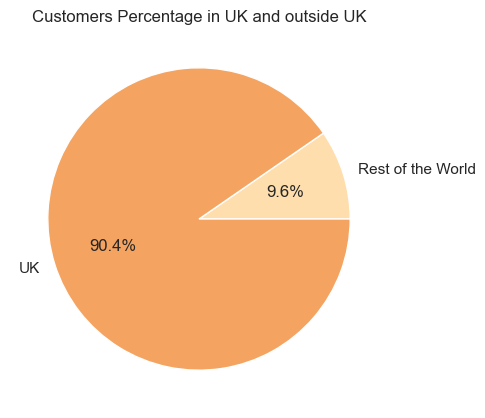

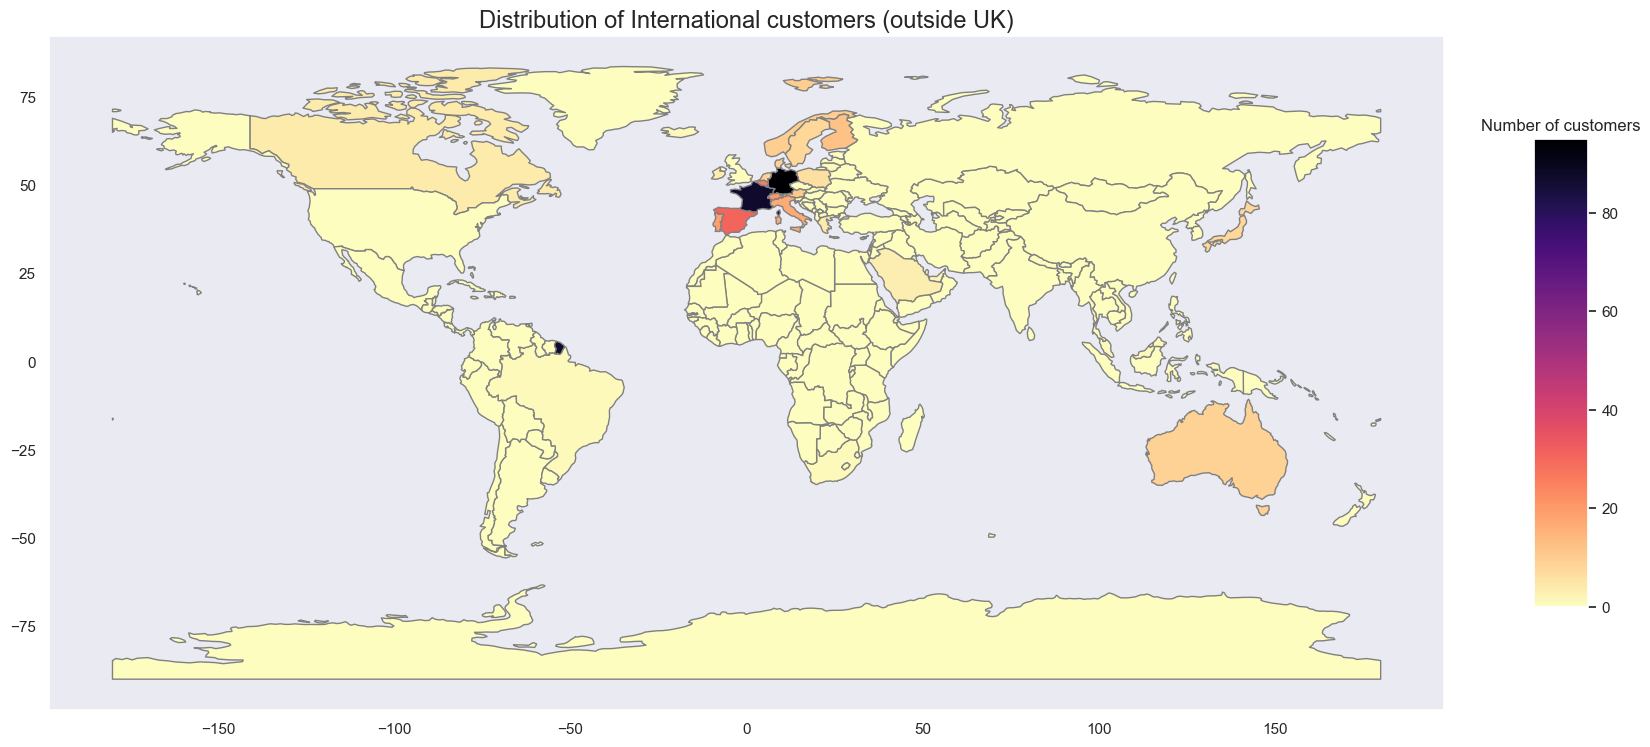

In [160]:
add_to_world(world,'CustomerID','totalcost', 'customers')

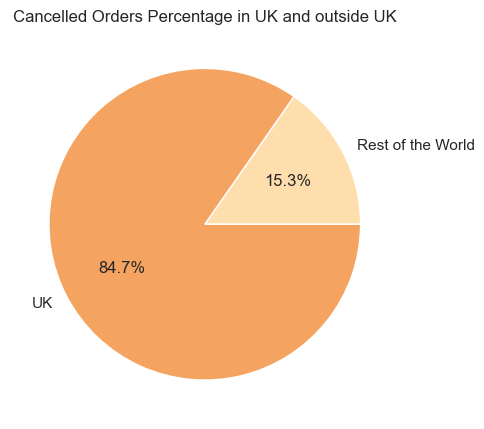

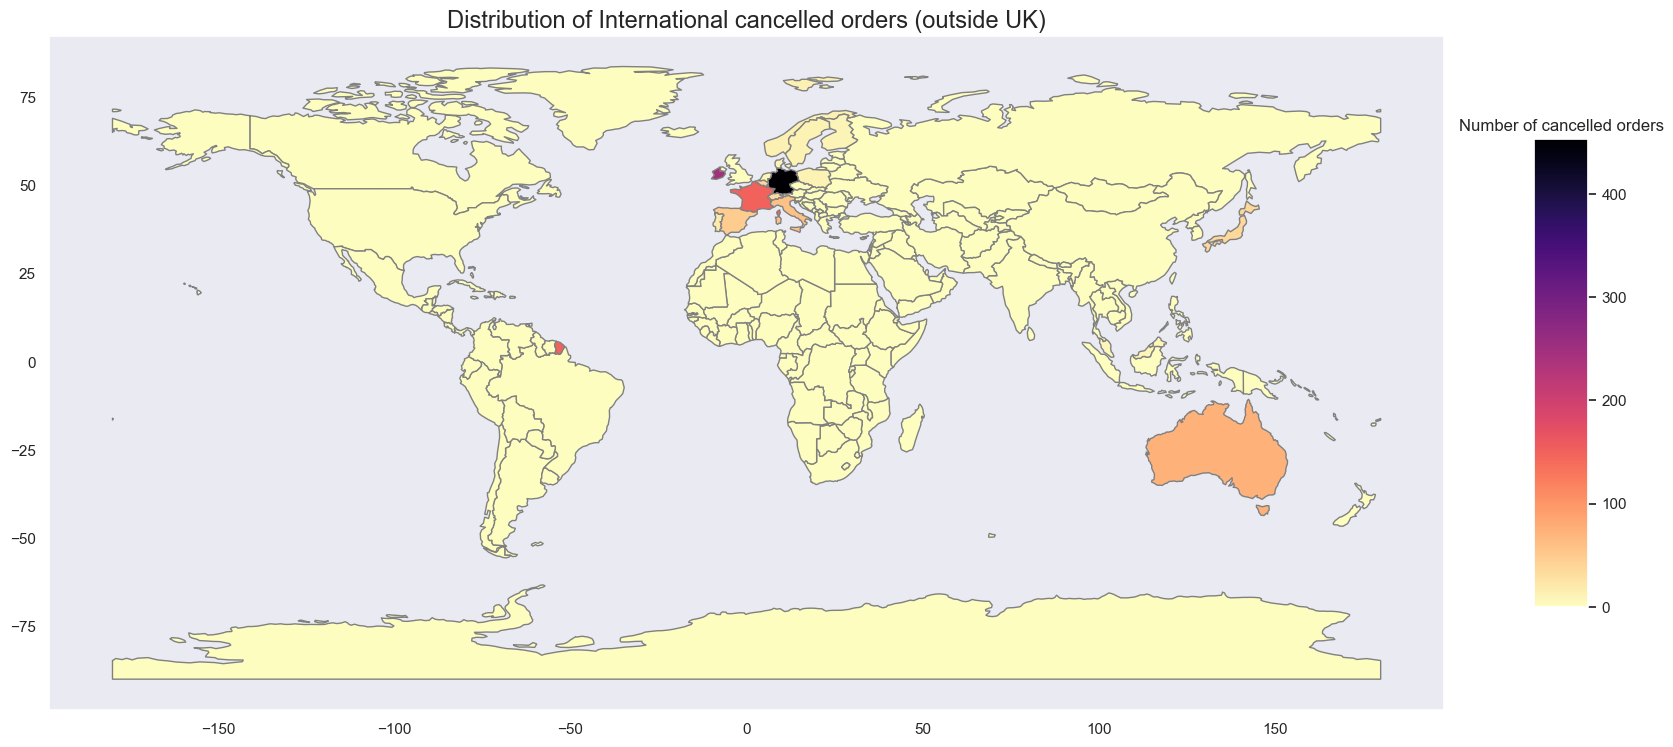

In [161]:
add_to_world(world,None,'Cancelled','cancelled orders')


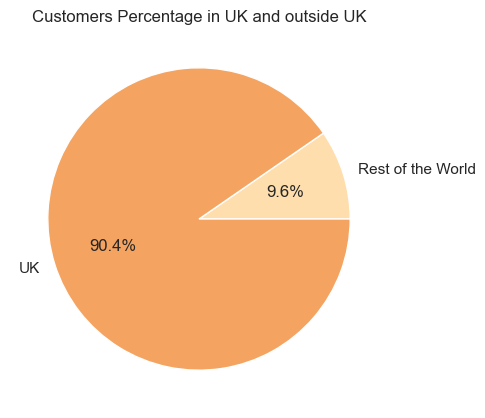

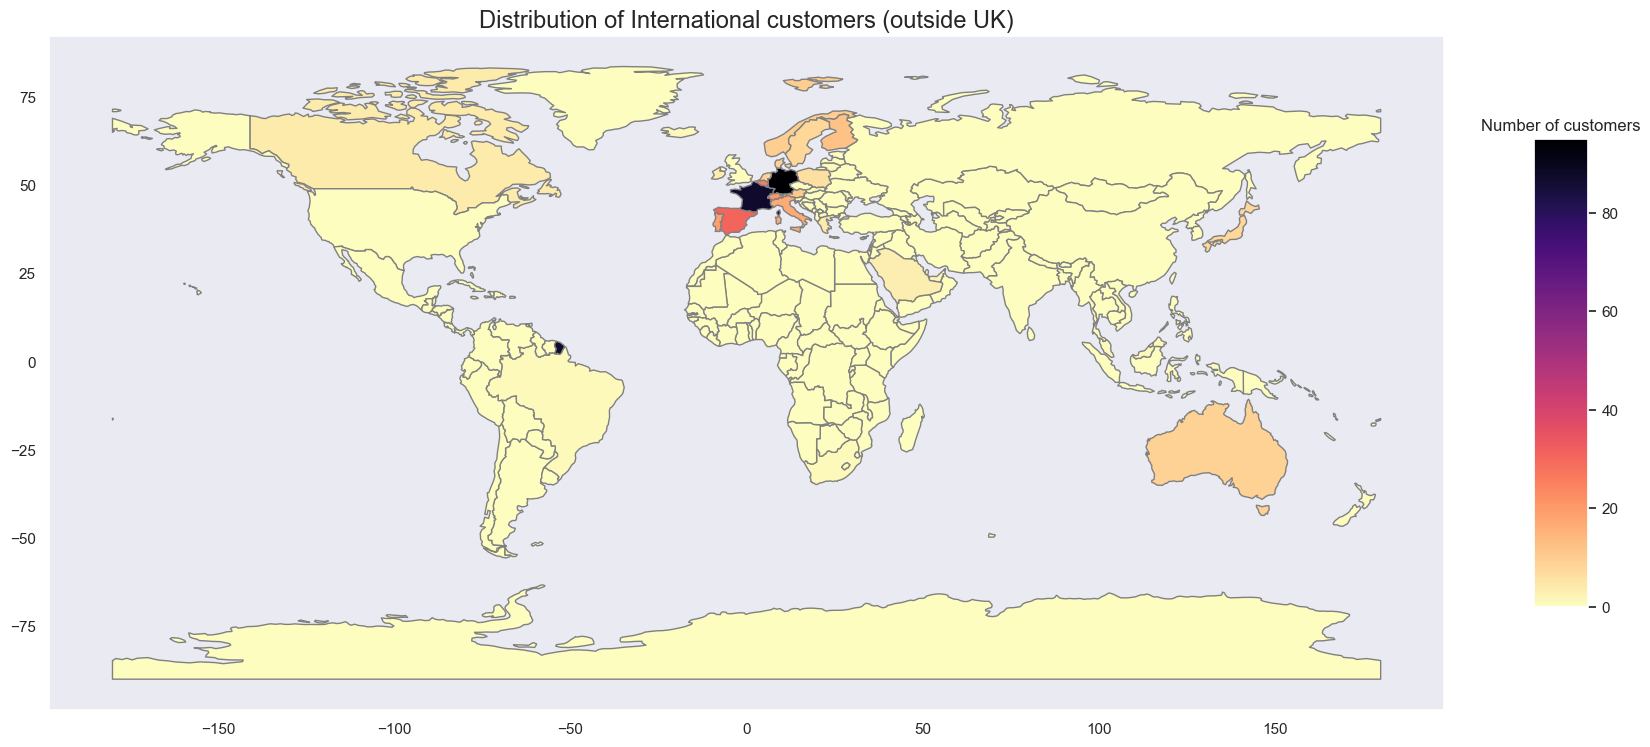

In [162]:
add_to_world(world,'CustomerID','TotalCust','customers')


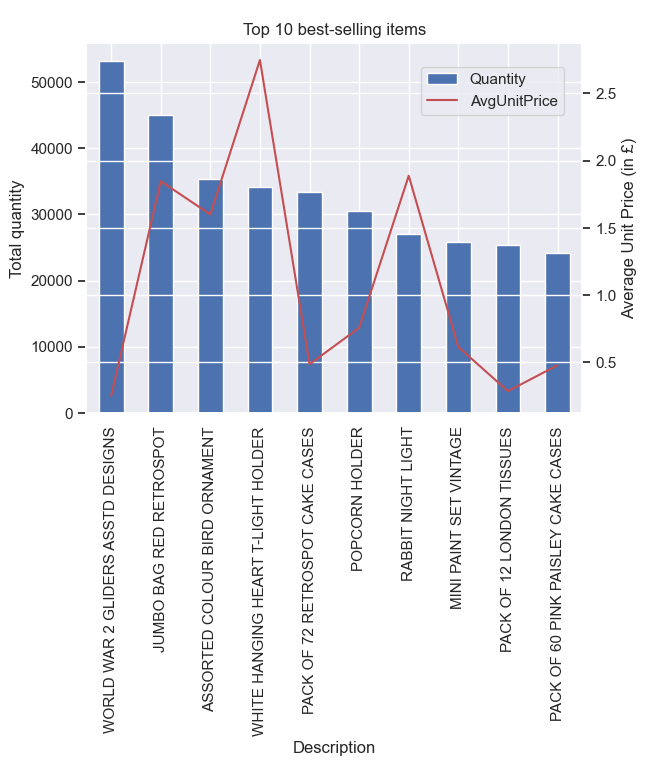

In [163]:
# Find the 10 best-selling items

Top10Qty = df.groupby('Description',as_index=False)['Quantity','totalPrice'].sum().sort_values(by='Quantity',
                                                                                               ascending=False).head(10)
Top10Qty['AvgUnitPrice'] = Top10Qty.totalPrice/Top10Qty.Quantity

# Plot top 10 most popular items

ax = Top10Qty.plot(x="Description", y="Quantity", legend=False,kind='bar')
ax2 = ax.twinx()
Top10Qty.plot(x="Description", y="AvgUnitPrice", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 best-selling items')
ax.set_ylabel('Total quantity')
ax2.set_ylabel('Average Unit Price (in £)')
plt.show()

## statistics

In [164]:
from scipy import stats

In [165]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['InvoiceDate'] = df.InvoiceDate.dt.date

In [166]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,totalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,0,20.34


In [167]:
print(df[(df.InvoiceNo.str.startswith('C')) & (df.totalPrice>0)])
print(df[(df.InvoiceNo.str.startswith('C')) & (df.Quantity>0)])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CancelledOrder, totalPrice]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CancelledOrder, totalPrice]
Index: []


In [168]:
# now i'm deciding to drop some unwanted columns like : customerid, invoice no, unit price, cancelled order

# Check column names in your DataFrame
print(df.columns)

# Check the structure of your DataFrame
print(df.info())

# Display the first few rows of your DataFrame
print(df.head())

# Verify that the DataFrame contains data
if not df.empty:
    # Drop specified columns
    col_to_drop = ['InvoiceNo', 'CustomerID', 'Country', 'Description', 'CancelledOrder', 'UnitPrice']
    df.drop(col_to_drop, axis=1, inplace=True)
else:
    print("DataFrame is empty or missing data.")



Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CancelledOrder', 'totalPrice'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       406829 non-null  object 
 1   StockCode       406829 non-null  object 
 2   Description     406829 non-null  object 
 3   Quantity        406829 non-null  int64  
 4   InvoiceDate     406829 non-null  object 
 5   UnitPrice       406829 non-null  float64
 6   CustomerID      406829 non-null  float64
 7   Country         406829 non-null  object 
 8   CancelledOrder  406829 non-null  int32  
 9   totalPrice      406829 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 29.5+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365 

In [169]:
df.head()

,StockCode,Quantity,InvoiceDate,totalPrice
0,85123A,6,2010-12-01,15.30
1,71053,6,2010-12-01,20.34
2,84406B,8,2010-12-01,22.00
3,84029G,6,2010-12-01,20.34
4,84029E,6,2010-12-01,20.34


In [170]:
df = df.groupby(['InvoiceDate','StockCode'],as_index=False).sum()
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [171]:
df['Year'] = df.InvoiceDate.dt.year
df['Quarter'] = df.InvoiceDate.dt.quarter
df['Month'] = df.InvoiceDate.dt.month
df['Week'] = df.InvoiceDate.dt.week
df['Weekday'] = df.InvoiceDate.dt.weekday
df['Day'] = df.InvoiceDate.dt.day
df['Dayofyear'] = df.InvoiceDate.dt.dayofyear
df['UnitPrice'] = df.totalPrice/df.Quantity

df.head(10)

,InvoiceDate,StockCode,Quantity,totalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
0,2010-12-01,10002,60,51.00,2010,4,12,48,2,1,335,0.850
1,2010-12-01,10125,2,1.70,2010,4,12,48,2,1,335,0.850
2,2010-12-01,10133,5,4.25,2010,4,12,48,2,1,335,0.850
3,2010-12-01,15044B,1,2.95,2010,4,12,48,2,1,335,2.950
4,2010-12-01,15056BL,20,113.00,2010,4,12,48,2,1,335,5.650
5,2010-12-01,15056N,50,236.30,2010,4,12,48,2,1,335,4.726
6,2010-12-01,15056P,48,220.80,2010,4,12,48,2,1,335,4.600
7,2010-12-01,16014,10,4.20,2010,4,12,48,2,1,335,0.420
8,2010-12-01,16016,10,8.50,2010,4,12,48,2,1,335,0.850
9,2010-12-01,16237,60,12.60,2010,4,12,48,2,1,335,0.210


In [172]:
df.describe()

,Quantity,totalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,225443.000000,225443.000000,225443.000000,225443.000000,225443.000000,225443.000000,225443.000000,225443.000000,225443.000000,224896.00
mean,21.765537,36.816693,2010.936751,2.739482,7.252858,29.409412,2.617123,15.119081,204.546253,NaN
std,71.245744,162.689951,0.243410,1.129934,3.447090,14.896456,1.930675,8.649044,104.379539,NaN
min,-8974.000000,-38970.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,-inf
25%,3.000000,6.250000,2011.000000,2.000000,4.000000,16.000000,1.000000,7.000000,111.000000,0.85
50%,8.000000,15.300000,2011.000000,3.000000,8.000000,32.000000,2.000000,15.000000,220.000000,1.69
75%,24.000000,33.150000,2011.000000,4.000000,10.000000,43.000000,4.000000,22.000000,299.000000,3.75
max,12540.000000,39619.500000,2011.000000,4.000000,12.000000,51.000000,6.000000,31.000000,357.000000,inf


In [173]:
# Filter rows with negative quantity
negative_quantity = df[df['Quantity'] < 0]

# Filter rows with negative total price
negative_total_price = df[df['totalPrice'] < 0]

# Display the results
print("Rows with Negative Quantity:")
print(negative_quantity)

print("\nRows with Negative Total Price:")
print(negative_total_price)


Rows with Negative Quantity:
       InvoiceDate StockCode  Quantity  totalPrice  Year  Quarter  Month  \
49      2010-12-01     20957        -1       -1.45  2010        4     12   
112     2010-12-01     21218        -3      -11.25  2010        4     12   
392     2010-12-01     22245        -2       -1.70  2010        4     12   
527     2010-12-01     22580        -3      -17.85  2010        4     12   
692     2010-12-01     22892        -7       -8.75  2010        4     12   
943     2010-12-01         D        -1      -27.50  2010        4     12   
1054    2010-12-02     21129        -2      -13.90  2010        4     12   
1170    2010-12-02     21586        -9      -22.95  2010        4     12   
1311    2010-12-02     22130      -126      -88.38  2010        4     12   
1326    2010-12-02     22175        -1       -2.95  2010        4     12   
1481    2010-12-02     22574      -168     -117.84  2010        4     12   
1484    2010-12-02     22578       -19      -16.15  2010   

       InvoiceDate StockCode  Quantity  totalPrice  Year  Quarter  Month  \
49      2010-12-01     20957        -1       -1.45  2010        4     12   
112     2010-12-01     21218        -3      -11.25  2010        4     12   
392     2010-12-01     22245        -2       -1.70  2010        4     12   
527     2010-12-01     22580        -3      -17.85  2010        4     12   
692     2010-12-01     22892        -7       -8.75  2010        4     12   
943     2010-12-01         D        -1      -27.50  2010        4     12   
1054    2010-12-02     21129        -2      -13.90  2010        4     12   
1170    2010-12-02     21586        -9      -22.95  2010        4     12   
1311    2010-12-02     22130      -126      -88.38  2010        4     12   
1326    2010-12-02     22175        -1       -2.95  2010        4     12   
1481    2010-12-02     22574      -168     -117.84  2010        4     12   
1484    2010-12-02     22578       -19      -16.15  2010        4     12   
1488    2010

In [174]:
# Drop rows with negative Quantity and TotalPrice
df = df[(df['Quantity'] > 0) & (df['totalPrice'] > 0)]

# Remove outliers in Quantity and TotalPrice using z-scores
z_scores = np.abs(stats.zscore(df[['Quantity', 'totalPrice']]))
df = df[(z_scores < 3).all(axis=1)]


In [175]:
df.describe()

,Quantity,totalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000
mean,17.577010,30.579788,2010.937065,2.738850,7.251319,29.402985,2.628999,15.132229,204.512827,2.942435
std,26.306509,46.754091,0.242847,1.130035,3.446634,14.895175,1.941001,8.650984,104.374952,4.790447
min,1.000000,0.001000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000500
25%,3.000000,6.720000,2011.000000,2.000000,4.000000,16.000000,1.000000,7.000000,111.000000,0.850000
50%,8.000000,15.300000,2011.000000,3.000000,8.000000,32.000000,2.000000,15.000000,220.000000,1.650000
75%,24.000000,32.300000,2011.000000,4.000000,10.000000,43.000000,4.000000,22.000000,299.000000,3.750000
max,212.000000,451.500000,2011.000000,4.000000,12.000000,51.000000,6.000000,31.000000,357.000000,308.820000
